In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import csv

# Imported API Key
from keys import covid

In [13]:
# List of states & query url to retrieve data for both

states = ['CA','TX','NY']

query = 'https://api.covidactnow.org/v2/state/{state}.timeseries.json?apiKey={covid}'

In [39]:
# California
headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
response = requests.get(f"https://api.covidactnow.org/v2/state/{states[0]}.timeseries.json?apiKey={covid}", headers=headers, data={})
myjson = response.json()

#print(json.dumps(myjson, indent=4, sort_keys=True))

In [15]:
# Extracting specified data from json file for California

ca_cases_per_date = []
ca_dates = []
ca_deaths = []

ca = myjson['actualsTimeseries']

for i in range(len(ca)):
       ca_cases_per_date.append(ca[i]['cases'])
       ca_dates.append(ca[i]['date'])
       ca_deaths.append(ca[i]['deaths'])

In [16]:
# Coverted to datetime to be able manipulate data as needed for California
ca_df = pd.DataFrame({'Date':ca_dates,
                        'Total Cases to Date':ca_cases_per_date,
                            'Deaths':ca_deaths})

ca_df['Date'] = pd.to_datetime(ca_df['Date'])
ca_df.head()

,Date,Total Cases to Date,Deaths
0,2020-01-25,1.0,0
1,2020-01-26,2.0,0
2,2020-01-27,2.0,0
3,2020-01-28,2.0,0
4,2020-01-29,2.0,0


In [17]:
# Grouped data by the month with the max number of cases and deaths per for California/Final DataFrame
california_df = pd.DataFrame(ca_df.groupby(pd.Grouper(key='Date', freq='M')).max())

california_df2 = california_df.reset_index()

california_df2['Date'] = california_df2['Date'].dt.strftime('%Y-%m')

california_df2.head()

,Date,Total Cases to Date,Deaths
0,2020-01,3.0,0
1,2020-02,28.0,0
2,2020-03,8583.0,184
3,2020-04,50470.0,2057
4,2020-05,113114.0,4242


In [18]:
# Parameter for charts
plt.rcParams["figure.figsize"] = (15,5.5)

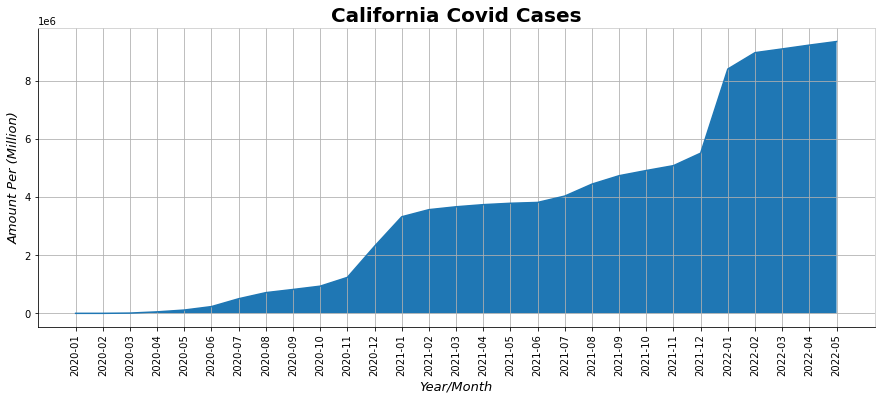

In [19]:
# California Chart
ca_months = california_df2['Date']
ca_cases = california_df2['Total Cases to Date']

ax = plt.subplot(111)
l = ax.fill_between(ca_months, ca_cases)

# Labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

plt.plot(ca_months, ca_cases)
plt.title('California Covid Cases')
plt.xlabel('Year/Month')
plt.ylabel('Amount Per (Million)')
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

xlab.set_style('italic')
xlab.set_size(13)
ylab.set_style('italic')
ylab.set_size(13)

# Title
ttl = ax.title
ttl.set_size(20)
ttl.set_weight('bold')

ax.grid('on')
plt.show()


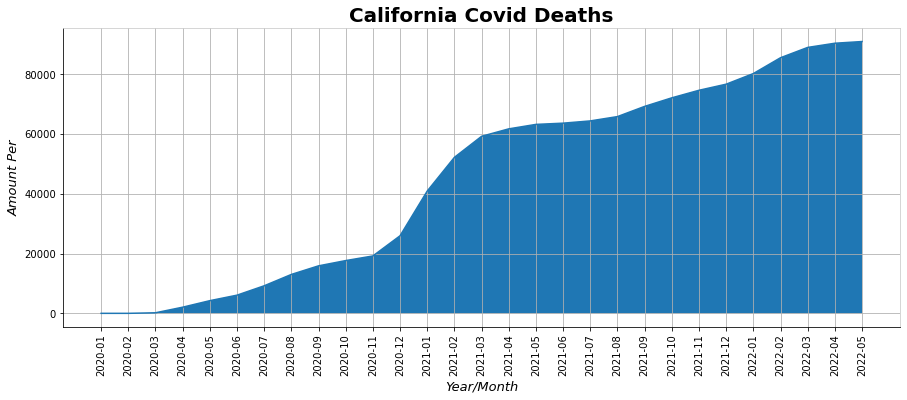

In [36]:
# California Chart
ca_deaths_per_date = california_df2['Deaths']

ax = plt.subplot(111)
l = ax.fill_between(ca_months, ca_deaths_per_date)

# Labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

plt.plot(ca_months, ca_deaths_per_date)
plt.title('California Covid Deaths')
plt.xlabel('Year/Month')
plt.ylabel('Amount Per')
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

xlab.set_style('italic')
xlab.set_size(13)
ylab.set_style('italic')
ylab.set_size(13)

# Title
ttl = ax.title
ttl.set_size(20)
ttl.set_weight('bold')

ax.grid('on')
plt.show()

In [21]:
# Texas
headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
response = requests.get(f"https://api.covidactnow.org/v2/state/{states[1]}.timeseries.json?apiKey={covid}", headers=headers, data={})
myjson = response.json()

In [22]:
# Extracting specified data from json file for Texas

tx_cases_per_date = []
tx_dates = []
tx_deaths = []

tx = myjson['actualsTimeseries']

for i in range(len(tx)):
       tx_cases_per_date.append(tx[i]['cases'])
       tx_dates.append(tx[i]['date'])
       tx_deaths.append(tx[i]['deaths'])

In [23]:
# Coverted to datetime to be able manipulate data as needed for Texas
tx_df = pd.DataFrame({'Date':tx_dates,
                        'Total Cases to Date':tx_cases_per_date,
                            'Deaths':tx_deaths})

tx_df['Date'] = pd.to_datetime(tx_df['Date'])
tx_df.head()

,Date,Total Cases to Date,Deaths
0,2020-02-12,1.0,0
1,2020-02-13,2.0,0
2,2020-02-14,2.0,0
3,2020-02-15,2.0,0
4,2020-02-16,2.0,0


In [24]:
# Grouped data by the month wtih the max number of cases and deaths per for Texas/Final DataFrame
texas_df = pd.DataFrame(ca_df.groupby(pd.Grouper(key='Date', freq='M')).max())

texas_df2 = texas_df.reset_index()

texas_df2['Date'] = texas_df2['Date'].dt.strftime('%Y-%m')

texas_df2.head()

,Date,Total Cases to Date,Deaths
0,2020-01,3.0,0
1,2020-02,28.0,0
2,2020-03,8583.0,184
3,2020-04,50470.0,2057
4,2020-05,113114.0,4242


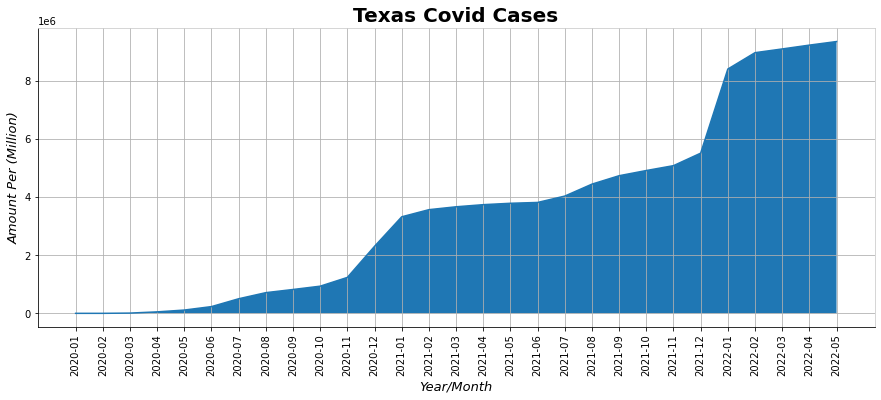

In [25]:
# Texas Chart
tx_months = texas_df2['Date']
tx_cases = texas_df2['Total Cases to Date']

ax = plt.subplot(111)
l = ax.fill_between(tx_months, tx_cases)

# Labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

plt.plot(tx_months, tx_cases)
plt.title('Texas Covid Cases')
plt.xlabel('Year/Month')
plt.ylabel('Amount Per (Million)')
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

xlab.set_style('italic')
xlab.set_size(13)
ylab.set_style('italic')
ylab.set_size(13)

# Title
ttl = ax.title
ttl.set_size(20)
ttl.set_weight('bold')

ax.grid('on')
plt.show()

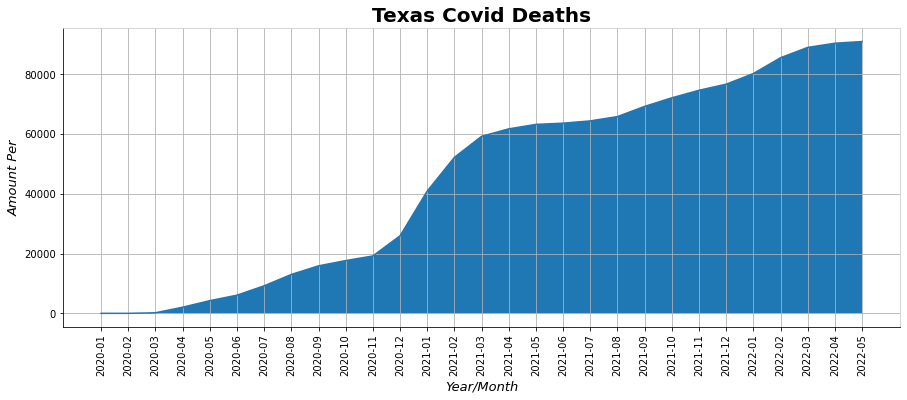

In [37]:
# Texas Chart
tx_deaths_per_date = texas_df2['Deaths']

ax = plt.subplot(111)
l = ax.fill_between(tx_months, tx_deaths_per_date)

# Tweaking of Labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

plt.plot(tx_months, tx_deaths_per_date)
plt.title('Texas Covid Deaths')
plt.xlabel('Year/Month')
plt.ylabel('Amount Per')
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

xlab.set_style('italic')
xlab.set_size(13)
ylab.set_style('italic')
ylab.set_size(13)

# tweak the title
ttl = ax.title
ttl.set_size(20)
ttl.set_weight('bold')

ax.grid('on')
plt.show()

In [27]:
# New York
headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
response = requests.get(f"https://api.covidactnow.org/v2/state/{states[2]}.timeseries.json?apiKey={covid}", headers=headers, data={})
myjson = response.json()

In [28]:
# Extracting specified data from json file for New York

ny_cases_per_date = []
ny_dates = []
ny_deaths = []

ny = myjson['actualsTimeseries']

for i in range(len(ny)):
       ny_cases_per_date.append(ny[i]['cases'])
       ny_dates.append(ny[i]['date'])
       ny_deaths.append(ny[i]['deaths'])

In [29]:
# Coverted to datetime to be able manipulate data as needed for New York
ny_df = pd.DataFrame({'Date':ny_dates,
                        'Total Cases to Date':ny_cases_per_date,
                            'Deaths':ny_deaths})

ny_df['Date'] = pd.to_datetime(ny_df['Date'])
ny_df.head()

,Date,Total Cases to Date,Deaths
0,2020-03-01,1.0,0
1,2020-03-02,1.0,0
2,2020-03-03,2.0,0
3,2020-03-04,11.0,0
4,2020-03-05,22.0,0


In [30]:
# Grouped data by the month wtih the max number of cases and deaths per for New York/Final DataFrame
new_york_df = pd.DataFrame(ca_df.groupby(pd.Grouper(key='Date', freq='M')).max())

new_york_df2 = new_york_df.reset_index()

new_york_df2['Date'] = new_york_df2['Date'].dt.strftime('%Y-%m')

new_york_df2.head()

,Date,Total Cases to Date,Deaths
0,2020-01,3.0,0
1,2020-02,28.0,0
2,2020-03,8583.0,184
3,2020-04,50470.0,2057
4,2020-05,113114.0,4242


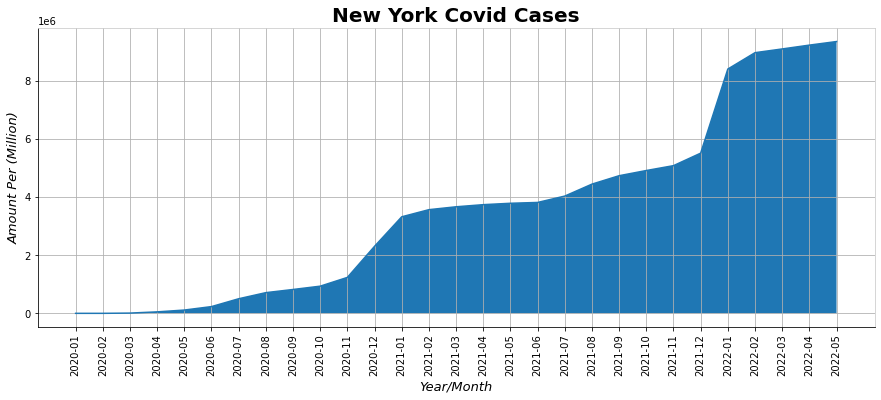

In [33]:
ny_months = new_york_df2['Date']
ny_cases = new_york_df2['Total Cases to Date']

ax = plt.subplot(111)
l = ax.fill_between(ny_months, ny_cases)

# Labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

plt.plot(ny_months, ny_cases)
plt.title('New York Covid Cases')
plt.xlabel('Year/Month')
plt.ylabel('Amount Per (Million)')
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

xlab.set_style('italic')
xlab.set_size(13)
ylab.set_style('italic')
ylab.set_size(13)

# Title
ttl = ax.title
ttl.set_size(20)
ttl.set_weight('bold')

ax.grid('on')
plt.show()

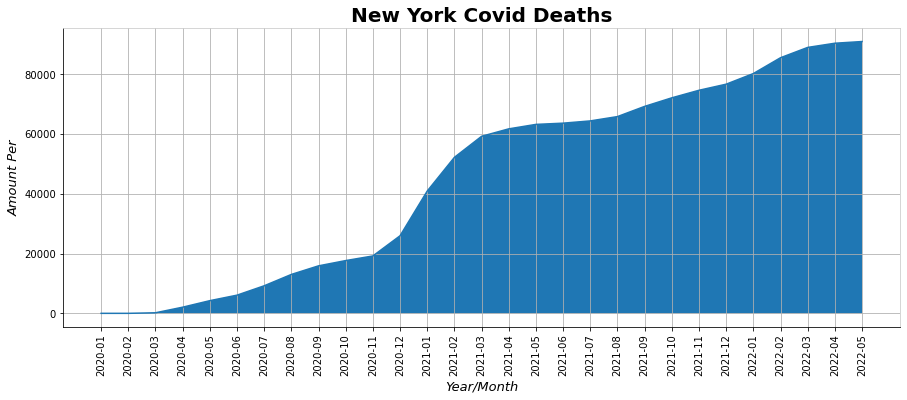

In [38]:
ny_deaths_per_date = new_york_df2['Deaths']

ax = plt.subplot(111)
l = ax.fill_between(ny_months, ny_deaths_per_date)

# Tweaking of Labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()

plt.plot(ny_months, ny_deaths_per_date)
plt.title('New York Covid Deaths')
plt.xlabel('Year/Month')
plt.ylabel('Amount Per')
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

xlab.set_style('italic')
xlab.set_size(13)
ylab.set_style('italic')
ylab.set_size(13)

# tweak the title
ttl = ax.title
ttl.set_size(20)
ttl.set_weight('bold')

ax.grid('on')
plt.show()